In [26]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv(r"C:\Users\10\Downloads\Noon-Web-Scraping-main\NoonPricelist.csv")

In [103]:
print(data.head(10))  

   Unnamed: 0                                       Title   Price Rating
0           0   Samsung Galaxy A15\nDual SIM Light Blue …   7,249    4.4
1           1    Samsung Galaxy S23\nUltra 5G Dual SIM P…  40,425    4.5
2           2     Samsung Galaxy A55\nDual SIM Awesome I…  19,830    4.5
3           3    Samsung Galaxy S23\nFE Dual Sim Purple …  25,250    4.4
4           4    Samsung Galaxy A15\nDual SIM Blue/Black…   6,949    4.4
5           5   Samsung Galaxy A15\nDual Sim Blue Black …   8,149    4.3
6           6  Samsung Galaxy S24\nUltra Dual SIM Titani…  46,650    4.3
7           7   Samsung Galaxy A25\nDual Sim Light Blue …  11,127    4.3
8           8      Samsung Galaxy A54\nDual Sim Awesome …  16,212    4.3
9           9     Samsung Galaxy A55\nDual SIM Awesome I…  19,488    4.5


# Scanning Our Dataset

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  247 non-null    int64 
 1   Title       247 non-null    object
 2   Price       247 non-null    object
 3   Rating      247 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


# Doing Some Sort Of Cleaning :

deleting unnecessary column :

In [105]:
data=data.drop('Unnamed: 0', axis=1)

cleaing records of ['Price'] :

In [106]:
data["Price"]=data["Price"].str.replace(',','').astype(float)

In [107]:
data.head(10)


,Title,Price,Rating
0,Samsung Galaxy A15\nDual SIM Light Blue …,7249.0,4.4
1,Samsung Galaxy S23\nUltra 5G Dual SIM P…,40425.0,4.5
2,Samsung Galaxy A55\nDual SIM Awesome I…,19830.0,4.5
3,Samsung Galaxy S23\nFE Dual Sim Purple …,25250.0,4.4
4,Samsung Galaxy A15\nDual SIM Blue/Black…,6949.0,4.4
5,Samsung Galaxy A15\nDual Sim Blue Black …,8149.0,4.3
6,Samsung Galaxy S24\nUltra Dual SIM Titani…,46650.0,4.3
7,Samsung Galaxy A25\nDual Sim Light Blue …,11127.0,4.3
8,Samsung Galaxy A54\nDual Sim Awesome …,16212.0,4.3
9,Samsung Galaxy A55\nDual SIM Awesome I…,19488.0,4.5


# Filling null values (NO Rating) with ['Rating'] Median

In [111]:
data['Rating'] = data['Rating'].replace('NO RATING',np.nan)
data['Rating'] =data['Rating'].astype(float)
data['Rating']= data['Rating'].fillna(data['Rating'].median())



What is The Most expensive Item in the Dataset?

In [112]:
# max item
max_price = data['Price'].max()
product_with_max_price = data.loc[data['Price'] == max_price, 'Title'].iloc[0]
print(f"The product with the highest price is '{product_with_max_price}' which costs {max_price}")

The product with the highest price is 'Samsung 85 Inch Neo
QLED 4K QA85QN9…' which costs 146680.0


What is the product with the Lowest price?


In [113]:
# min item
min_price = data['Price'].min()
product_with_min_price = data.loc[data['Price'] == min_price, 'Title'].iloc[0]
print(f"The product with the Lowest price is '{product_with_min_price}' which costs {min_price}")

The product with the highest price is 'Samsung Samsung
Glass For Samsung …' which costs 22.0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   247 non-null    object 
 1   Price   247 non-null    float64
 2   Rating  247 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.9+ KB



# Insights for Ratings.

In [117]:
data['Rating'].value_counts()

Rating
4.4    67
4.3    38
4.5    28
5.0    22
4.2    18
4.6    15
4.1    10
4.0     9
3.9     9
4.7     6
3.8     4
4.9     4
3.3     3
3.5     3
4.8     3
3.0     2
3.4     2
3.6     2
2.0     1
2.9     1
Name: count, dtype: int64

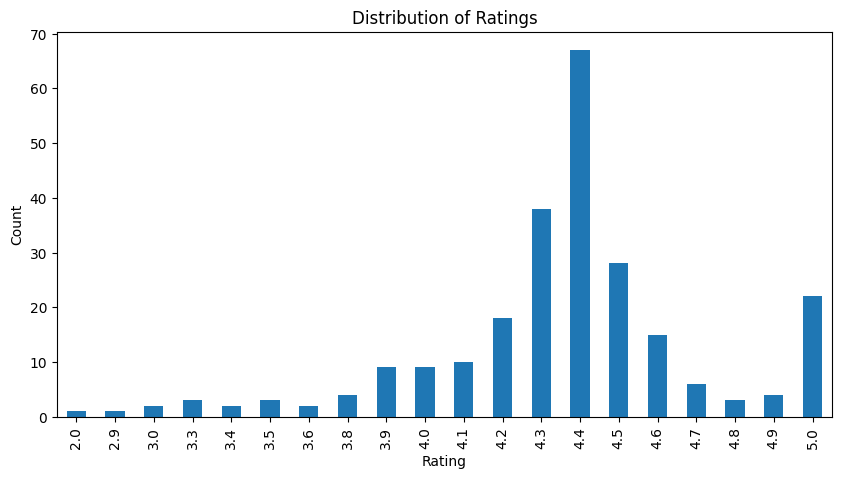

In [125]:

# Plot the value counts using a bar plot
plt.figure(figsize=(10, 5))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


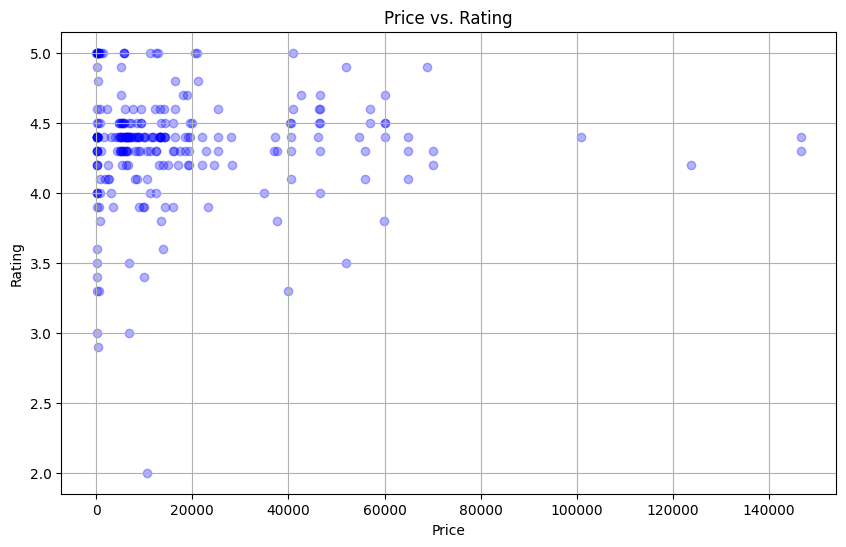

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Price'], data['Rating'], color='blue', alpha=0.3)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


# insights about the Products with paying attention to rating

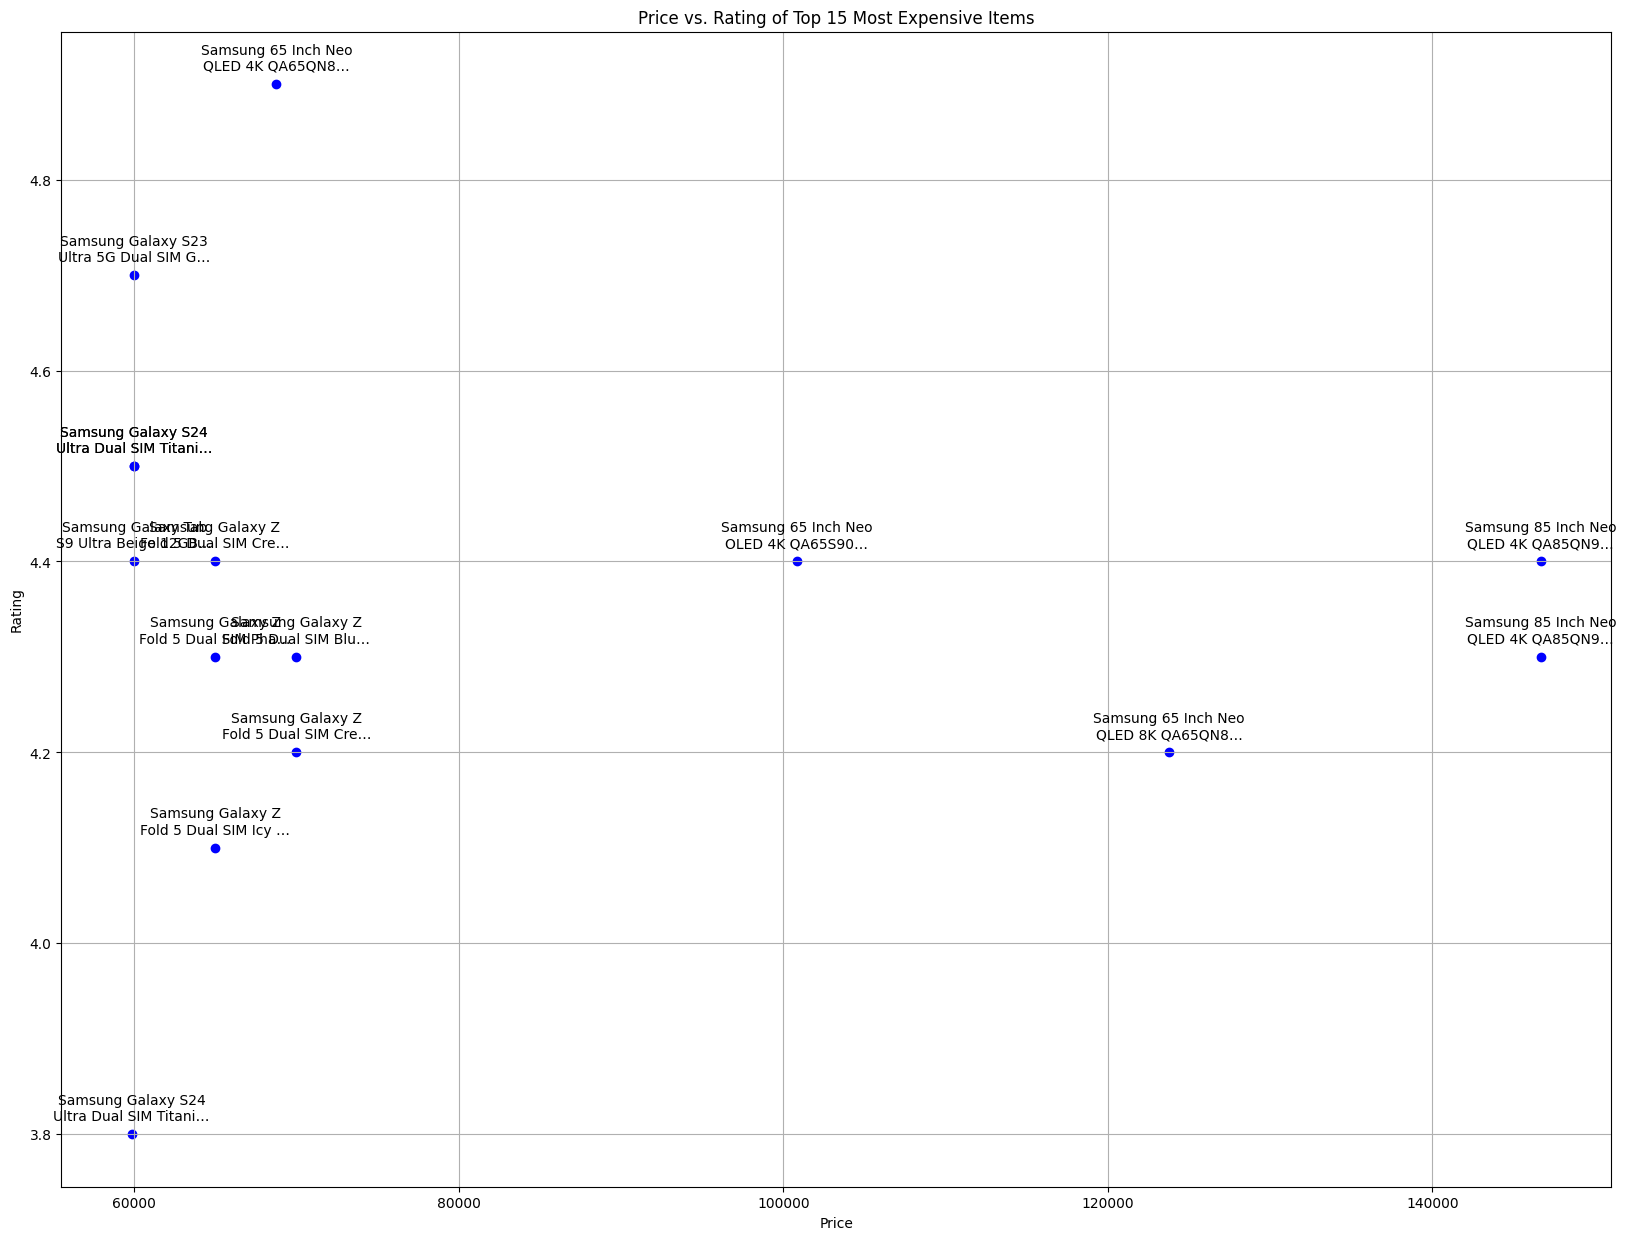

In [134]:
df_sorted = data.sort_values(by='Price', ascending=False).head(15)

plt.figure(figsize=(20, 15))
plt.scatter(df_sorted['Price'], df_sorted['Rating'], color='blue', alpha=1)

# Annotate each point with the title
for i in range(len(df_sorted)):
    plt.annotate(df_sorted['Title'].iloc[i], 
                 (df_sorted['Price'].iloc[i], df_sorted['Rating'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title('Price vs. Rating of Top 15 Most Expensive Items')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()